In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import glob
print("first 10:", *glob.glob("/opt/ml/input/data/train/images/*")[:10])
print("total number:", len(glob.glob("/opt/ml/input/data/train/images/*")))

first 10: /opt/ml/input/data/train/images/006178_female_Asian_19 /opt/ml/input/data/train/images/001761_male_Asian_44 /opt/ml/input/data/train/images/005140_female_Asian_32 /opt/ml/input/data/train/images/006487_female_Asian_18 /opt/ml/input/data/train/images/005502_female_Asian_49 /opt/ml/input/data/train/images/003759_male_Asian_50 /opt/ml/input/data/train/images/005102_female_Asian_58 /opt/ml/input/data/train/images/006098_male_Asian_18 /opt/ml/input/data/train/images/000778_female_Asian_56 /opt/ml/input/data/train/images/001840-1_male_Asian_22
total number: 2700


In [3]:
file_name = glob.glob("/opt/ml/input/data/train/images/*")
file_name = [x.split('/')[-1] for x in file_name]
data_name = [[x, *x.split('_')] for x in file_name]
print("data_name: ", data_name[:10])
print("number of elements: ", set([len(x) for x in data_name]))

data_name:  [['006178_female_Asian_19', '006178', 'female', 'Asian', '19'], ['001761_male_Asian_44', '001761', 'male', 'Asian', '44'], ['005140_female_Asian_32', '005140', 'female', 'Asian', '32'], ['006487_female_Asian_18', '006487', 'female', 'Asian', '18'], ['005502_female_Asian_49', '005502', 'female', 'Asian', '49'], ['003759_male_Asian_50', '003759', 'male', 'Asian', '50'], ['005102_female_Asian_58', '005102', 'female', 'Asian', '58'], ['006098_male_Asian_18', '006098', 'male', 'Asian', '18'], ['000778_female_Asian_56', '000778', 'female', 'Asian', '56'], ['001840-1_male_Asian_22', '001840-1', 'male', 'Asian', '22']]
number of elements:  {5}


In [4]:
def func_mask(mask):
    return "incorrect" if "incorrect" in mask else "normal" if "normal" in mask else "mask"

for i in range(len(data_name)):
    temp_dir = glob.glob("/opt/ml/input/data/train/images/"+data_name[i][0]+"/*")
    temp = []
    for x in temp_dir:
        temp.append(func_mask(x.split('/')[-1]))
    data_name[i].append(temp)

print("data_name: ", data_name[:10])

data_name:  [['006178_female_Asian_19', '006178', 'female', 'Asian', '19', ['mask', 'mask', 'mask', 'normal', 'mask', 'incorrect', 'mask']], ['001761_male_Asian_44', '001761', 'male', 'Asian', '44', ['mask', 'mask', 'normal', 'mask', 'mask', 'mask', 'incorrect']], ['005140_female_Asian_32', '005140', 'female', 'Asian', '32', ['mask', 'mask', 'normal', 'mask', 'mask', 'mask', 'incorrect']], ['006487_female_Asian_18', '006487', 'female', 'Asian', '18', ['mask', 'mask', 'normal', 'mask', 'mask', 'mask', 'incorrect']], ['005502_female_Asian_49', '005502', 'female', 'Asian', '49', ['mask', 'mask', 'normal', 'mask', 'mask', 'mask', 'incorrect']], ['003759_male_Asian_50', '003759', 'male', 'Asian', '50', ['mask', 'mask', 'normal', 'mask', 'mask', 'mask', 'incorrect']], ['005102_female_Asian_58', '005102', 'female', 'Asian', '58', ['mask', 'mask', 'normal', 'mask', 'mask', 'mask', 'incorrect']], ['006098_male_Asian_18', '006098', 'male', 'Asian', '18', ['mask', 'mask', 'normal', 'mask', 'mask'

(array([192.,   0., 407.,   0., 267.,   0.,   0.,  41.,   0.,  58.,   0.,
         72.,   0.,   0.,  62.,   0.,  82.,   0.,   0.,  44.,   0.,  15.,
          0.,  25.,   0.,   0.,  16.,   0.,  17.,   0.,   3.,   0.,   0.,
          7.,   0.,   5.,   0.,   0.,  13.,   0.,  19.,   0.,   8.,   0.,
          0.,   3.,   0.,  14.,   0.,   0.,   6.,   0.,  20.,   0.,   7.,
          0.,   0.,  13.,   0.,  18.,   0.,  13.,   0.,   0.,  27.,   0.,
         14.,   0.,   0.,  10.,   0.,  39.,   0.,  31.,   0.,   0.,  80.,
          0.,  63.,   0.,  78.,   0.,   0.,  64.,   0.,  82.,   0.,   0.,
        100.,   0., 123.,   0., 106.,   0.,   0., 159.,   0.,  85.,   0.,
        192.]),
 array([18.  , 18.42, 18.84, 19.26, 19.68, 20.1 , 20.52, 20.94, 21.36,
        21.78, 22.2 , 22.62, 23.04, 23.46, 23.88, 24.3 , 24.72, 25.14,
        25.56, 25.98, 26.4 , 26.82, 27.24, 27.66, 28.08, 28.5 , 28.92,
        29.34, 29.76, 30.18, 30.6 , 31.02, 31.44, 31.86, 32.28, 32.7 ,
        33.12, 33.54, 33.96, 34.38

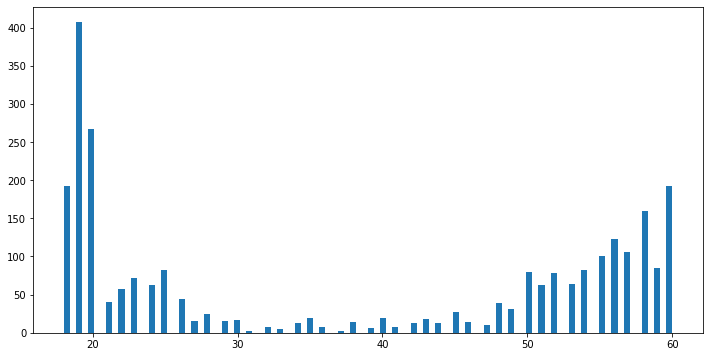

In [20]:
fig = plt.figure(figsize=(12,6))
age_all = [int(x[4]) for x in data_name]
age_all.sort()
plt.hist(age_all, bins=100)

In [10]:
from collections import Counter

def func_age(age):
    return "young" if age < 30 else "old" if age >= 60 else "mid"

population = []
for x in data_name:
    temp = []
    for i in range(len(x[-1])):
        temp.append(x[-1][i]+'_'+x[2]+'_'+func_age(int(x[4])))
    population.extend(temp)

Counter(population)

Counter({'mask_female_young': 3660,
         'normal_female_young': 732,
         'incorrect_female_young': 732,
         'mask_male_mid': 2050,
         'normal_male_mid': 410,
         'incorrect_male_mid': 410,
         'mask_female_mid': 4085,
         'normal_female_mid': 817,
         'incorrect_female_mid': 817,
         'mask_male_young': 2745,
         'normal_male_young': 549,
         'incorrect_male_young': 549,
         'mask_female_old': 545,
         'normal_female_old': 109,
         'incorrect_female_old': 109,
         'mask_male_old': 415,
         'normal_male_old': 83,
         'incorrect_male_old': 83})

In [11]:
mapping = {
    'mask_male_young': '0',
    'mask_male_mid': '1',
    'mask_male_old': '2',
    'mask_female_young': '3',
    'mask_female_mid': '4',
    'mask_female_old': '5',
    'incorrect_male_young': '6',
    'incorrect_male_mid': '7',
    'incorrect_male_old': '8',
    'incorrect_female_young': '9',
    'incorrect_female_mid': '10',
    'incorrect_female_old': '11',
    'normal_male_young': '12',
    'normal_male_mid': '13',
    'normal_male_old': '14',
    'normal_female_young': '15',
    'normal_female_mid': '16',
    'normal_female_old': '17',
}

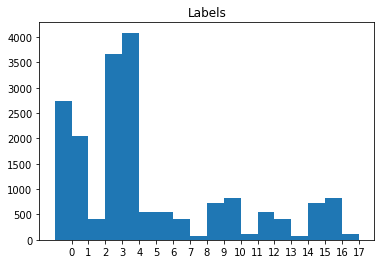

In [12]:
labels, values = zip(*Counter(population).items())
labels = [int(mapping[x]) for x in labels]
zipped_lists = zip(labels, values)
sorted_pairs = sorted(zipped_lists)
labels, values = zip(*sorted_pairs)

indexes = np.arange(len(labels))
width = 1

plt.title("Labels")
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

<BarContainer object of 3 artists>

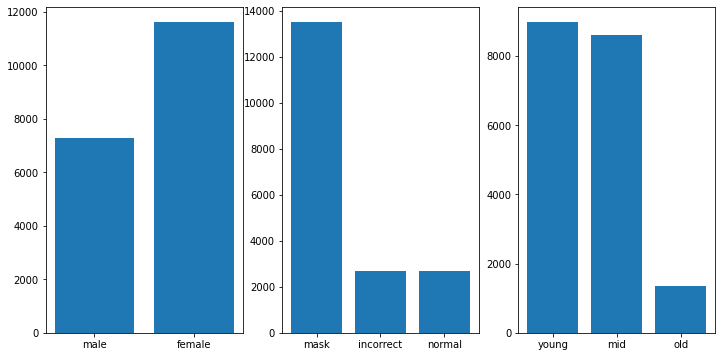

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

gender = {"male":0, "female":0}
for x in population:
    if "female" in x: gender["female"] += 1
    else: gender["male"] += 1

mask = {"mask":0, "incorrect":0, "normal": 0}
for x in population:
    if "mask" in x: mask["mask"] += 1
    elif "incorrect" in x: mask["incorrect"] += 1
    else: mask["normal"] += 1

age = {"young":0, "mid":0, "old": 0}
for x in population:
    if "young" in x: age["young"] += 1
    elif "mid" in x: age["mid"] += 1
    else: age["old"] += 1

ax[0].bar(list(gender.keys()), gender.values())
ax[1].bar(list(mask.keys()), mask.values())
ax[2].bar(list(age.keys()), age.values())

001436_male_Asian_57


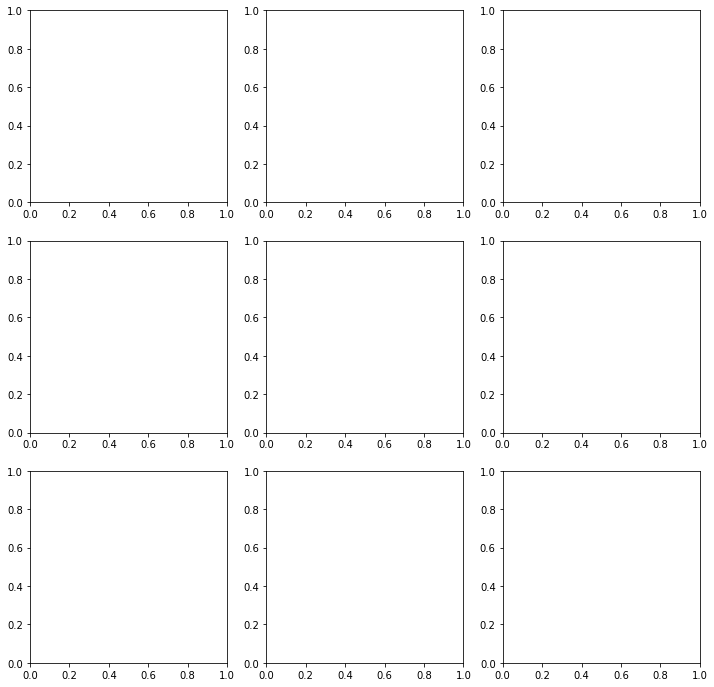

In [28]:
import random
from PIL import Image
fig, ax = plt.subplots(3, 3, figsize = (12, 12))
ax = ax.flatten()
for i in range(9):
    print(random.choice(data_name)[0])
    idx1 = random.choice(data_name)
    idx2 = random.randint(0, 6)
    image_path = "/opt/ml/input/data/train/images/" + data_name[idx1][0]
    print(glob.glob(image_path+"/*").choice())
    print(image_path)
    break
#     ax[i] = 
# image_path = '/opt/ml/input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg'
# im = Image.open(image_path)
# plt.imshow(np.array(im).squeeze(), cmap='gray')
# im.show()